In [1]:
import sqlite3
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [3]:
# Loading the dataset.
con=sqlite3.connect('/Users/bhuvanagopalakrishnabasapur/PycharmProjects/Practise/Assignments/Wildfire_Project/Wildfire_project/FPA_FOD_20170508.sqlite')
df = pd.read_sql_query("SELECT * FROM Fires", con)
pd.set_option('display.max_columns', None)
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,LOCAL_INCIDENT_ID,FIRE_CODE,FIRE_NAME,ICS_209_INCIDENT_NUMBER,ICS_209_NAME,MTBS_ID,MTBS_FIRE_NAME,COMPLEX_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,PNF-47,BJ8K,FOUNTAIN,None,None,None,None,None,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,13,AAC0,PIGEON,None,None,None,None,None,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,021,A32W,SLACK,None,None,None,None,None,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,6,None,DEER,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,7,None,STEVENOT,None,None,None,None,None,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [3]:
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [5]:
missing_percentage(df)

,Total,Percent
COMPLEX_NAME,1875282,99.72
MTBS_ID,1869462,99.41
MTBS_FIRE_NAME,1869462,99.41
ICS_209_INCIDENT_NUMBER,1854748,98.63
ICS_209_NAME,1854748,98.63
FIRE_CODE,1555636,82.73
LOCAL_FIRE_REPORT_ID,1459286,77.60
CONT_TIME,972173,51.70
FIRE_NAME,957189,50.90
CONT_DOY,891531,47.41


In [4]:
# Dropping all those columns whose missing values are greater than 70%
df = df.drop(['COMPLEX_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
            'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'FIRE_CODE', 'LOCAL_FIRE_REPORT_ID'], axis=1)
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_INCIDENT_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,PNF-47,FOUNTAIN,2005,2453403.5,33,1300,9.0,Miscellaneous,2453403.5,33.0,1730,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,PIGEON,2004,2453137.5,133,0845,1.0,Lightning,2453137.5,133.0,1530,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,021,SLACK,2004,2453156.5,152,1921,5.0,Debris Burning,2453156.5,152.0,2024,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,6,DEER,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1400,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,7,STEVENOT,2004,2453184.5,180,1600,1.0,Lightning,2453189.5,185.0,1200,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 32 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   OBJECTID                    int64  
 1   FOD_ID                      int64  
 2   FPA_ID                      object 
 3   SOURCE_SYSTEM_TYPE          object 
 4   SOURCE_SYSTEM               object 
 5   NWCG_REPORTING_AGENCY       object 
 6   NWCG_REPORTING_UNIT_ID      object 
 7   NWCG_REPORTING_UNIT_NAME    object 
 8   SOURCE_REPORTING_UNIT       object 
 9   SOURCE_REPORTING_UNIT_NAME  object 
 10  LOCAL_INCIDENT_ID           object 
 11  FIRE_NAME                   object 
 12  FIRE_YEAR                   int64  
 13  DISCOVERY_DATE              float64
 14  DISCOVERY_DOY               int64  
 15  DISCOVERY_TIME              object 
 16  STAT_CAUSE_CODE             float64
 17  STAT_CAUSE_DESCR            object 
 18  CONT_DATE                   float64
 19  CONT_DOY             

In [8]:
#Data Visualizations

In [5]:
sns.set(style="ticks")
numcols = [
 'LATITUDE',
 'LONGITUDE',
'OWNER_CODE','FIRE_SIZE',  'CONT_DOY',  'CONT_DATE','STAT_CAUSE_CODE', 'DISCOVERY_DOY', 'DISCOVERY_DATE',
       'FIRE_YEAR']
#catcols = ['FIPS_NAME','FIPS_CODE','COUNTY','STATE','OWNER_DESCR','CONT_TIME','STAT_CAUSE_DESCR','DISCOVERY_TIME']
catcols = ['COUNTY','STATE','FIRE_SIZE_CLASS']
# Subset the columns
plot_df = df[numcols+ catcols]
# Few rows of data
plot_df.head()

,LATITUDE,LONGITUDE,OWNER_CODE,FIRE_SIZE,CONT_DOY,CONT_DATE,STAT_CAUSE_CODE,DISCOVERY_DOY,DISCOVERY_DATE,FIRE_YEAR,COUNTY,STATE,FIRE_SIZE_CLASS
0,40.036944,-121.005833,5.0,0.10,33.0,2453403.5,9.0,33,2453403.5,2005,63,CA,A
1,38.933056,-120.404444,5.0,0.25,133.0,2453137.5,1.0,133,2453137.5,2004,61,CA,A
2,38.984167,-120.735556,13.0,0.10,152.0,2453156.5,5.0,152,2453156.5,2004,17,CA,A
3,38.559167,-119.913333,5.0,0.10,185.0,2453189.5,1.0,180,2453184.5,2004,3,CA,A
4,38.559167,-119.933056,5.0,0.10,185.0,2453189.5,1.0,180,2453184.5,2004,3,CA,A


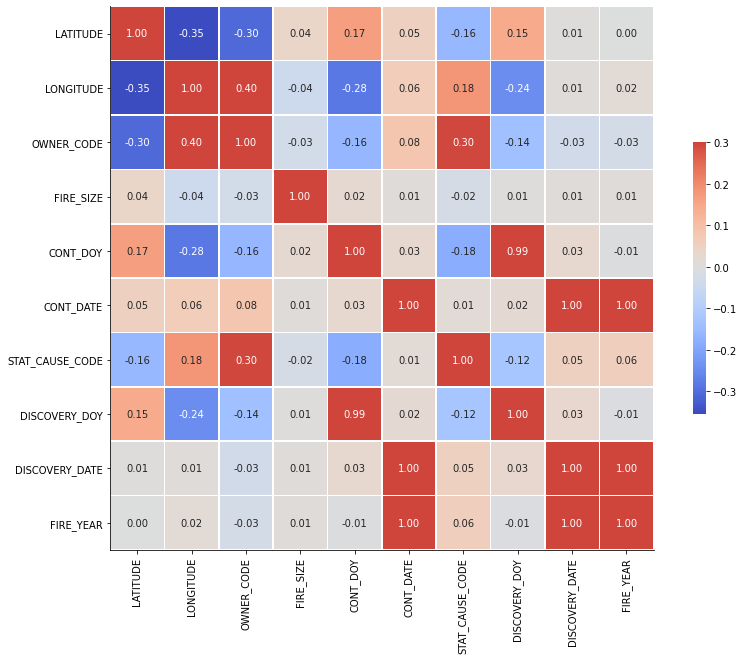

In [10]:
corr = plot_df.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(14,10)
    
plt.show()

In [7]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted



def conditional_entropy(x, y):
    """
    Calculates the conditional entropy of x given y: S(x|y)
    Wikipedia: https://en.wikipedia.org/wiki/Conditional_entropy
    :param x: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :param y: list / NumPy ndarray / Pandas Series
        A sequence of measurements
    :return: float
    """
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x


def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = numerator/denominator
    return eta


def associations(dataset, nominal_columns=None, mark_columns=False, theil_u=False, plot=True,
                          return_results = False, **kwargs):
    

    dataset = convert(dataset, 'dataframe')
    columns = dataset.columns
    if nominal_columns is None:
        nominal_columns = list()
    elif nominal_columns == 'all':
        nominal_columns = columns
    corr = pd.DataFrame(index=columns, columns=columns)
    for i in range(0,len(columns)):
        for j in range(i,len(columns)):
            if i == j:
                corr[columns[i]][columns[j]] = 1.0
            else:
                if columns[i] in nominal_columns:
                    if columns[j] in nominal_columns:
                        if theil_u:
                            corr[columns[j]][columns[i]] = theils_u(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = theils_u(dataset[columns[j]],dataset[columns[i]])
                        else:
                            cell = cramers_v(dataset[columns[i]],dataset[columns[j]])
                            corr[columns[i]][columns[j]] = cell
                            corr[columns[j]][columns[i]] = cell
                    else:
                        cell = correlation_ratio(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                else:
                    if columns[j] in nominal_columns:
                        cell = correlation_ratio(dataset[columns[j]], dataset[columns[i]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
                    else:
                        cell, _ = ss.pearsonr(dataset[columns[i]], dataset[columns[j]])
                        corr[columns[i]][columns[j]] = cell
                        corr[columns[j]][columns[i]] = cell
    corr.fillna(value=np.nan, inplace=True)
    if mark_columns:
        marked_columns = ['{} (nom)'.format(col) if col in nominal_columns else '{} (con)'.format(col) for col in columns]
        corr.columns = marked_columns
        corr.index = marked_columns
    if plot:
        plt.figure(figsize=(20,20))#kwargs.get('figsize',None))
        sns.heatmap(corr, annot=kwargs.get('annot',True), fmt=kwargs.get('fmt','.2f'), cmap='coolwarm')
        plt.show()
    if return_results:
        return corr


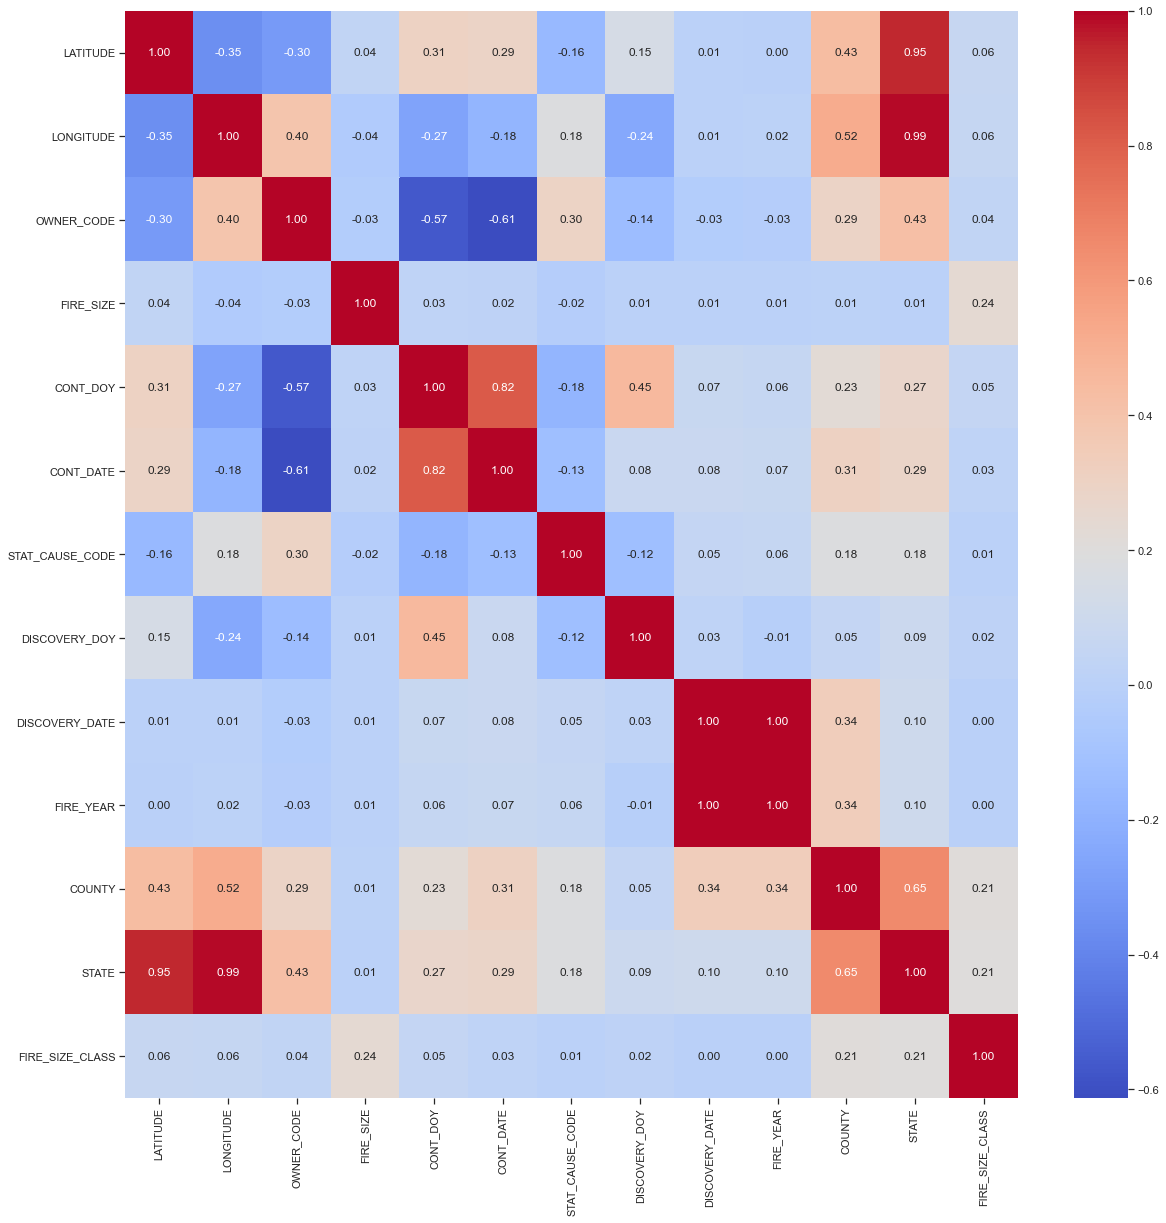

NameError: name 'g' is not defined

In [8]:
#Heat Map
plot_df = plot_df.fillna(0)
results = associations(plot_df,nominal_columns=catcols,return_results=True)
sns.despine()
g.figure.set_size_inches(14,10)
plt.show()

In [13]:
plot_df.isnull().sum()

LATITUDE           0
LONGITUDE          0
OWNER_CODE         0
FIRE_SIZE          0
CONT_DOY           0
CONT_DATE          0
STAT_CAUSE_CODE    0
DISCOVERY_DOY      0
DISCOVERY_DATE     0
FIRE_YEAR          0
COUNTY             0
STATE              0
FIRE_SIZE_CLASS    0
dtype: int64

In [14]:
print(df['STATE'].value_counts().sort_values(ascending=False).head(10))

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
Name: STATE, dtype: int64


In [15]:
df["STATE"].unique()

array(['CA', 'NM', 'OR', 'NC', 'WY', 'CO', 'WA', 'MT', 'UT', 'AZ', 'SD',
       'AR', 'NV', 'ID', 'MN', 'TX', 'FL', 'SC', 'LA', 'OK', 'KS', 'MO',
       'NE', 'MI', 'KY', 'OH', 'IN', 'VA', 'IL', 'TN', 'GA', 'AK', 'ND',
       'WV', 'WI', 'AL', 'NH', 'PA', 'MS', 'ME', 'VT', 'NY', 'IA', 'DC',
       'MD', 'CT', 'MA', 'NJ', 'HI', 'DE', 'PR', 'RI'], dtype=object)

In [16]:
print(df['FIRE_SIZE_CLASS'].value_counts().sort_values(ascending=False).head(10))

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64


In [17]:
df["FIRE_SIZE_CLASS"].unique()

array(['A', 'B', 'G', 'C', 'D', 'F', 'E'], dtype=object)

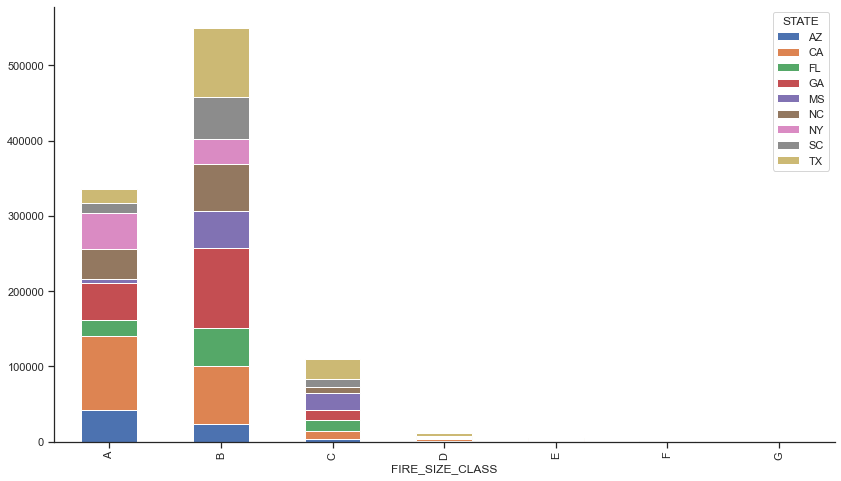

In [18]:
sns.set(style="ticks")

filtered_fire_df = df[(df['FIRE_SIZE_CLASS'].isin(['A', 'B',
       'C', 'D', 'E', 'F','G'])) &
                      (df['STATE'].isin(['CA', 'GA', 'TX',
       'NC', 'FL','SC','NY','MS','AZ']))
                     ]

df_plot = filtered_fire_df.groupby(['FIRE_SIZE_CLASS', 'STATE']).size().reset_index().pivot(columns='FIRE_SIZE_CLASS',
                                                                                         index='STATE',
                                                                                         values=0).reset_index()

g = df_plot.set_index('STATE').T.plot(kind='bar', stacked=True,
                                            color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(14, 8)
plt.show()

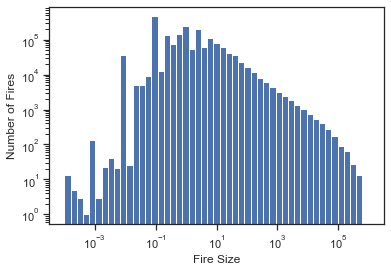

Mean fire size: 74.52015833992388
Median fire size: 1.0
Var in fire size: 6237993.350462397


In [19]:
#Distibution of fire size
plt.hist(df['FIRE_SIZE'], bins=np.logspace(-4,6, 50));
plt.ylabel('Number of Fires')
plt.xlabel('Fire Size')
plt.gca().set_yscale("log")
plt.gca().set_xscale("log")
plt.savefig("kaggle_fires_dist_log.png")
plt.show()

print("Mean fire size: {}".format(np.mean(df['FIRE_SIZE'])))
print("Median fire size: {}".format(np.median(df['FIRE_SIZE'])))
print("Var in fire size: {}".format(np.var(df['FIRE_SIZE'])))

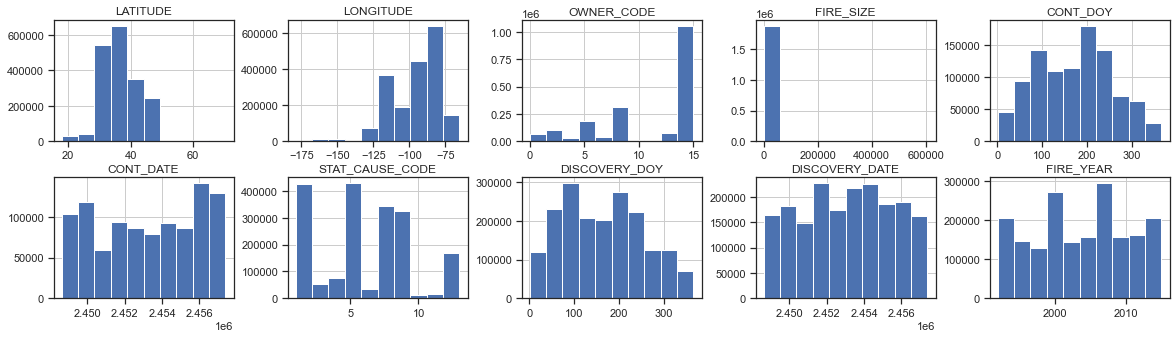

In [20]:
#Understanding the data distribution in the numeric columns/features:
df[numcols].hist(bins=10, figsize=(20, 8), layout=(3, 5));

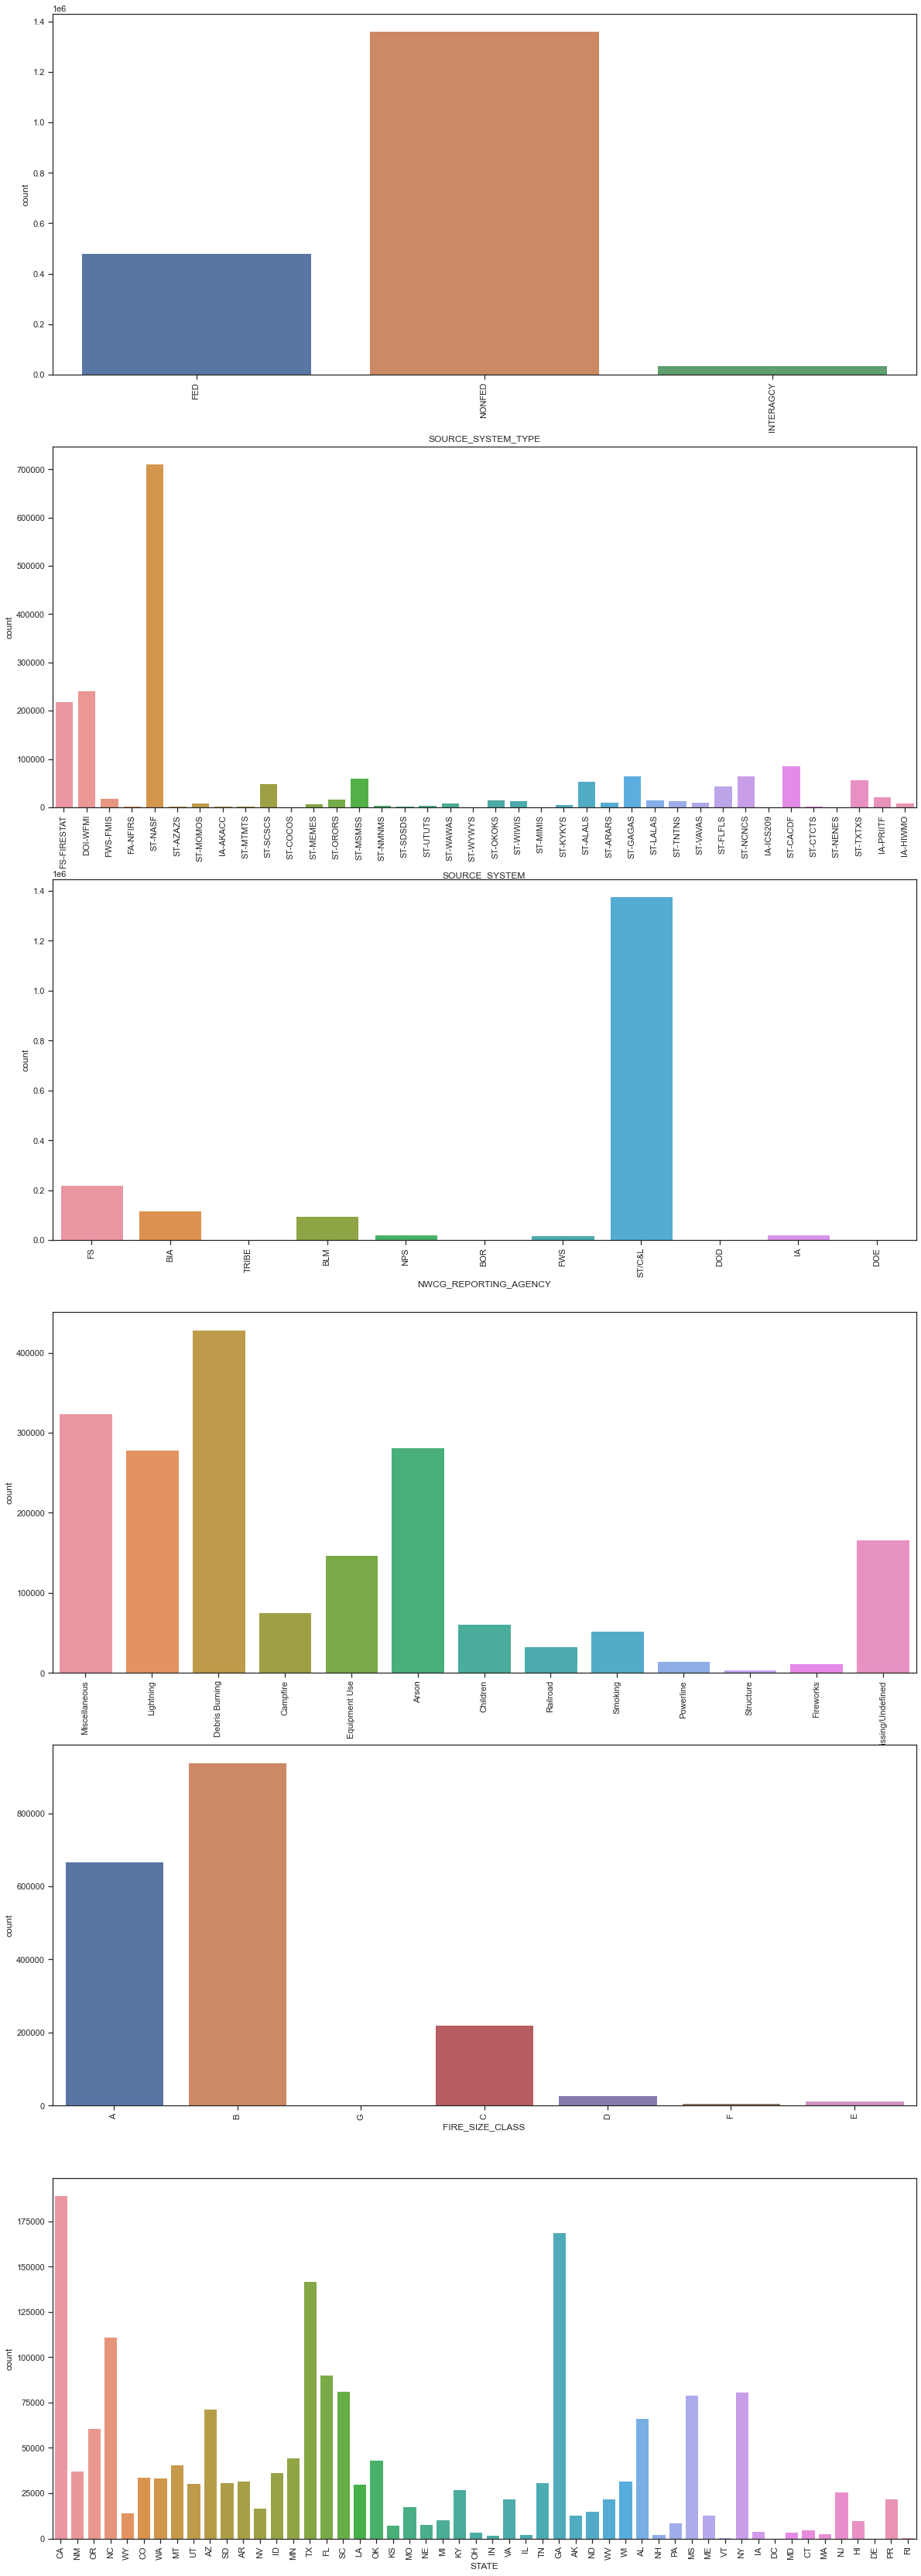

In [21]:
#Understanding the data distribution in the categorical columns/features:
categorical = ['SOURCE_SYSTEM_TYPE','SOURCE_SYSTEM','NWCG_REPORTING_AGENCY','STAT_CAUSE_DESCR','FIRE_SIZE_CLASS','STATE']
fig, ax = plt.subplots(6, 1, figsize=(20, 60))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [12]:
#Scatter plot between all numeric variables and target variable FIRE_SIZE. This plot help to examine how well a target variable is correlated with dependent variables.
fig, ax = plt.subplots(9, 1, figsize=(20, 50))
for variable, subplot in zip(numcols, ax.flatten()):
    sns.scatterplot(df[variable], df['FIRE_SIZE'], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


In [ ]:
missing_percentage(df)

In [ ]:
#Feature reduction

In [ ]:
#Removing the following columns as similar attributes are present with no missing values
#CONT_TIME, FIRE_NAME, CONT_DOY, CONT_DATE, DISCOVERY_TIME
df = df.drop(['CONT_TIME', 'CONT_DOY', 'CONT_DATE', 'DISCOVERY_TIME'], axis=1)

In [ ]:
#Removing columns which do not affect the model 
#FIRE_NAME, LOCAL_INCIDENT_ID, FIPS_NAME , FIPS_CODE, NWCG_REPORTING_UNIT_NAME, NWCG_REPORTING_UNIT_ID,  
# NWCG_REPORTING_AGENCY, SOURCE_REPORTING_UNIT, SOURCE_REPORTING_UNIT_NAME, SOURCE_SYSTEM, SOURCE_SYSTEM_TYPE, 
# FPA_ID, FOD_ID, OWNER_CODE, OWNER_DESCR, FIRE_YEAR
# can remove COUNTY as well as there is an attribute STATE and cannot fill median values 
# for COUNTY as they may not match with the states
df = df.drop(['FIRE_NAME', 'LOCAL_INCIDENT_ID', 'FIPS_NAME' , 'FIPS_CODE', 'NWCG_REPORTING_UNIT_NAME', 'NWCG_REPORTING_UNIT_ID',  
                'NWCG_REPORTING_AGENCY', 'SOURCE_REPORTING_UNIT', 'SOURCE_REPORTING_UNIT_NAME', 'SOURCE_SYSTEM', 
                'SOURCE_SYSTEM_TYPE', 'FPA_ID', 'FOD_ID', 'OWNER_CODE', 'OWNER_DESCR', 'COUNTY', 'FIRE_YEAR'], axis=1)

In [ ]:
#Observed that the vales in 'Shape' attribute are very long and not understandable. 
# As the shape does not affect the model will be removing Shape as well
df = df.drop(['Shape'], axis=1)

In [ ]:
# Removing the attribute STAT_CAUSE_DESCR as STAT_CAUSE_DESCR is the description of STAT_CAUSE_CODE
df = df.drop(['STAT_CAUSE_DESCR'], axis=1)

In [ ]:
df.head()